In [ ]:
# 数据预处理：
# 1. 视频转化为图片
# 2. 图片segment分割
# 3. 图片聚类得到label
# 4. 文本预处理
# 5. 最终数据合并    

In [ ]:
############################################ 1. 视频转化为图片

In [ ]:
# 将所有的csv合并在一起。
import os
import pandas as pd

# 设置文件夹路径和输出文件名
folder_path = '/data1/dxw_data/llm/redbook_final/data/red_02/good'  # 替换为你的文件夹路径
# good文件夹里面是:
# 02_post_data_2024-06-16.csv
# 02_post_data_2024-06-17.csv
# 02_post_data_2024-06-18.csv
# 02_post_data_2024-06-19.csv
# 02_post_data_2024-06-20.csv
# 02_post_data_2024-06-21.csv
# 02_post_data_2024-06-22.cs
# 02_post_data_2024-06-23.csv
# 02_post_data_2024-06-24.csv
# 02_post_data_2024-06-25.csv
# 02_post_data_2024-06-26.csv
# 02_post_data_2024-06-27.csv
# 02_post_data_2024-06-28.csv
# 02_post_data_2024-06-29.csv
# 02_post_data_2024-06-30.csv
# 02_post_data_2024-07-01.csv
# 02_post_data_2024-07-02.csv
# 02_post_data_2024-07-03.csv
output_file = '/data1/dxw_data/llm/redbook_final/data/red_02/merged_good_raw.csv'  # 替换为你想要输出的文件名

# 创建一个空的列表来存储所有数据
all_data_frames = []

# 遍历文件夹中的所有CSV文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # 读取CSV文件并追加到列表中
        df = pd.read_csv(file_path)
        all_data_frames.append(df)

# 将所有数据框合并到一个大的数据框中
merged_df = pd.concat(all_data_frames, ignore_index=True)

# 将合并后的数据保存到一个新的CSV文件中
merged_df.to_csv(output_file, index=False)

print(f'所有文件已合并到 {output_file}')

#! 里面有些行看起来有问题，但是其实都是对的，不用管。


In [ ]:
# 读取 合并额csv_path 文件中的数据，并根据文件层次和目录读取对应的 path_filex 中的所有 png 和 mp4 文件，然后将它们重新命名并保存到 output_file_path 中。
# 按照日期排序

import os
import shutil
import pandas as pd
from tqdm import tqdm

# 设置文件路径
csv_path = "/home/disk1/red_disk1/test/poster_test_fashion.csv"  # 请替换为你的CSV文件路径
path_filex = "/home/disk1/red_disk1/test/data"  # 请替换为你的path_filex目录路径
output_file_path = "/home/disk1/red_disk1/test/video_img_all"  # 请替换为你的输出文件路径

# 读取CSV文件
df = pd.read_csv(csv_path)

# 遍历每一行数据，加入进度条
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing files"):
    poster_id = row['poster_id']
    post_id = row['post_id']
    post_date = row['post_date']
    
    # 检查并修改post_date
    if post_date.startswith('2023-') or post_date.startswith('2024-'):
        post_date = post_date[5:]  # 删减掉前面的年份部分
    
    # 获取子文件夹路径
    subfolder_path = os.path.join(path_filex, str(poster_id), str(post_id))
    
    # 检查子文件夹是否存在
    if os.path.exists(subfolder_path):
        # 遍历子文件夹中的文件
        for file_name in os.listdir(subfolder_path):
            # 获取文件的完整路径
            file_path = os.path.join(subfolder_path, file_name)
            
            # 仅处理png和mp4文件
            if file_name.endswith('.png') or file_name.endswith('.mp4'):
                # 新文件名
                new_file_name = f"{post_date}_{poster_id}_{post_id}_{file_name}"
                new_file_path = os.path.join(output_file_path, new_file_name)
                
                # 创建输出文件夹路径（如果不存在）
                os.makedirs(output_file_path, exist_ok=True)
                
                # 复制并重命名文件到输出文件夹
                shutil.copy(file_path, new_file_path)
                
print("文件处理完成！")



In [ ]:
# 将视频也变成对应的png图片。
import os
import shutil
import cv2
import pandas as pd
from tqdm import tqdm

# 设置文件路径
input_file_path = "/home/disk1/red_disk1/test/video_img_all"
output_file_path = "/home/disk1/red_disk1/test/video_img_all_png"

# 创建输出文件夹路径（如果不存在）
os.makedirs(output_file_path, exist_ok=True)

# 遍历输入文件夹中的文件
for file_name in tqdm(os.listdir(input_file_path), desc="Processing files"):
    input_file = os.path.join(input_file_path, file_name)
    
    # 处理mp4文件
    if file_name.endswith('.mp4'):
        # 读取视频文件
        video_capture = cv2.VideoCapture(input_file)
        fps = video_capture.get(cv2.CAP_PROP_FPS)
        frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frame_count / fps
        
        # 获取视频在1/4, 2/4, 3/4时刻的帧
        for i in range(1, 4):
            frame_time = duration * i / 4
            video_capture.set(cv2.CAP_PROP_POS_MSEC, frame_time * 1000)
            success, frame = video_capture.read()
            if success:
                # 保存帧为图片
                output_image_name = f"{file_name[:-4]}_{i}.png"
                output_image_path = os.path.join(output_file_path, output_image_name)
                cv2.imwrite(output_image_path, frame)
        
        # 释放视频捕获对象
        video_capture.release()
    
    # 处理png文件
    elif file_name.endswith('.png'):
        output_image_path = os.path.join(output_file_path, file_name)
        shutil.copy(input_file, output_image_path)

print("文件处理完成！")



In [ ]:
########################################################### 2. 图片segment分割

In [ ]:
# 使用segment模型，将video_img_all_png变为segment_data，得到mask图片。在命令行运行下列指令

# 去github下载安装：https://github.com/cxgincsu/SemanticGuidedHumanMatting


# bash 运行SemanticGuidedHumanMatting,
cd /home/disk1/red_disk1/SemanticGuidedHumanMatting

   CUDA_VISIBLE_DEVICES=1 python test_image.py \
       --images-dir "/home/disk1/red_disk1/test/video_img_all_png" \
       --result-dir "/home/disk1/red_disk1/test/segment_data" \
       --pretrained-weight ./pretrained/SGHM-ResNet50.pth


In [ ]:
# 合并掩码mask图片，得到训练用的imge文件夹
import os
from PIL import Image, ImageEnhance
import numpy as np
from tqdm import tqdm  # 导入tqdm库

def apply_mask(image, mask):
    """
    将掩码应用到图片上，保留掩码区域内的图片部分
    """
    image_np = np.array(image)
    mask_np = np.array(mask)
    
    # 增加掩码对比度
    enhancer = ImageEnhance.Contrast(mask)
    mask = enhancer.enhance(2.0)



    
    
    mask_np = np.array(mask)
    
    # 将掩码二值化，保留白色部分（255）
    mask_binary = (mask_np > 128).astype(np.uint8)  # 使用阈值化处理掩码
    
    # 应用掩码，保留白色区域
    masked_image = image_np * mask_binary[:, :, np.newaxis]
    
    # 确保掩码区域透明处理
    alpha_channel = mask_binary * 255
    masked_image = np.dstack((masked_image, alpha_channel))
    
    return Image.fromarray(masked_image.astype(np.uint8))

def merge_images(image_dir, mask_dir, output_dir):
    """
    合并图片和掩码，并保存到新的文件夹
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.png')]
    
    for image_file in tqdm(image_files, desc="Processing images"):
        image_path = os.path.join(image_dir, image_file)
        mask_path = os.path.join(mask_dir, image_file)
        
        if not os.path.exists(mask_path):
            print(f"掩码缺失: {mask_path}")
            continue
        
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # 假设掩码是灰度图
        
        masked_image = apply_mask(image, mask)
        output_path = os.path.join(output_dir, image_file)
        masked_image.save(output_path, 'PNG')  # 保存为PNG格式以保留透明度
        # print(f"图片已合并并保存到 {output_path}！")

# 定义图片、掩码和输出文件夹路径
image_dir = r'/home/disk1/red_disk1/test/video_img_all_png'  # 替换为你的正常图片文件夹路径
mask_dir = r'/home/disk1/red_disk1/test/segment_data'  # 替换为你的掩码图片文件夹路径
output_dir = r'/home/disk1/red_disk1/test/combined_seg_img'  # 替换为你的输出文件夹路径

merge_images(image_dir, mask_dir, output_dir)



########## 至此，得到图片mask数据

#### 可视化分割不准确的特殊情况

1. 增加对比度增强：通过 ImageEnhance.Contrast 增加掩码的对比度，使得掩码更明显。
2. 可视化特殊情况：通过 visualize_special_cases 函数可视化并保存分割不准确的情况。
3. 添加特殊情况检测：在 merge_images 函数中，添加了对掩码区域过小或过大的情况检测，并将这些特殊情况保存到 special_cases_dir 目录中。
4. 使用 tqdm 进行进度显示：方便查看处理进度。
5. 使用 matplotlib 进行可视化：可以更加灵活地展示图片和掩码。

In [2]:
import os
from PIL import Image, ImageEnhance
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def apply_mask(image, mask, threshold=128):
    """
    将掩码应用到图片上，保留掩码区域内的图片部分
    """
    image_np = np.array(image)
    mask_np = np.array(mask)

    # 增加掩码对比度
    enhancer = ImageEnhance.Contrast(mask)
    mask = enhancer.enhance(2.0)

    mask_np = np.array(mask)

    # 将掩码二值化，保留白色部分（255）
    mask_binary = (mask_np > threshold).astype(np.uint8)  # 使用阈值化处理掩码

    # 应用掩码，保留白色区域
    masked_image = image_np * mask_binary[:, :, np.newaxis]

    # 确保掩码区域透明处理
    alpha_channel = mask_binary * 255
    masked_image = np.dstack((masked_image, alpha_channel))

    return Image.fromarray(masked_image.astype(np.uint8)), mask_binary

def visualize_special_cases(image, mask, output_path, issue_type):
    """
    可视化并保存分割不准确的情况
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f'Issue: {issue_type}')
    plt.suptitle('Special Case Detected')
    plt.savefig(output_path)
    plt.close()

def merge_images(image_dir, mask_dir, output_dir, special_cases_dir, threshold=128):
    """
    合并图片和掩码，并保存到新的文件夹，同时可视化和保存特殊情况
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    if not os.path.exists(special_cases_dir):
        os.makedirs(special_cases_dir)
    
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.png')]
    
    for image_file in tqdm(image_files, desc="Processing images"):
        image_path = os.path.join(image_dir, image_file)
        mask_path = os.path.join(mask_dir, image_file)
        
        if not os.path.exists(mask_path):
            print(f"掩码缺失: {mask_path}")
            continue
        
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # 假设掩码是灰度图
        
        masked_image, mask_binary = apply_mask(image, mask, threshold)
        output_path = os.path.join(output_dir, image_file)
        masked_image.save(output_path, 'PNG')  # 保存为PNG格式以保留透明度

        # 检查特殊情况并可视化
        if np.sum(mask_binary) < 0.1 * mask_binary.size:  # 例如：掩码区域过小
            special_case_path = os.path.join(special_cases_dir, f"small_mask_{image_file}")
            visualize_special_cases(image, mask, special_case_path, "Small Mask Area")
        elif np.sum(mask_binary) > 0.9 * mask_binary.size:  # 例如：掩码区域过大
            special_case_path = os.path.join(special_cases_dir, f"large_mask_{image_file}")
            visualize_special_cases(image, mask, special_case_path, "Large Mask Area")

# 定义图片、掩码和输出文件夹路径 
image_dir = r'/home/disk1/red_disk1/test/video_img_all_png'  # 替换为你的正常图片文件夹路径
mask_dir = r'/home/disk1/red_disk1/test/segment_data'  # 替换为你的掩码图片文件夹路径
output_dir = r'/home/disk1/red_disk1/test/combined_seg_img'  # 替换为你的输出文件夹路径
special_cases_dir = r'/home/disk1/red_disk1/test/special_cases'  # 替换为你的特殊情况输出文件夹路径

merge_images(image_dir, mask_dir, output_dir, special_cases_dir)



Processing images: 100%|██████████| 68841/68841 [3:17:16<00:00,  5.82it/s]  


In [ ]:
################################################ 3. 图片聚类得到label

In [3]:
# 指定聚类数量的imagebind的算法，开始给图片分配标签
# 需要从https://github.com/facebookresearch/ImageBind?tab=readme-ov-file中下载：imagebind的预训练 保存到/.checkpoints：  


import os
import json
import torch
from sklearn.cluster import KMeans
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind import data
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Paths
input_folder = '/home/disk1/red_disk1/test/combined_seg_img' 
output_folder = '/home/disk1/red_disk1/test/output_cluster_imagebind3'
os.makedirs(output_folder, exist_ok=True)

# Device setup
device = "cuda:1" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load image paths
image_paths = [os.path.join(input_folder, fname) for fname in os.listdir(input_folder) if fname.endswith('.png')]

# Function to load and transform a batch of images
def load_images_batch(image_paths_batch):
    images = [transform(Image.open(path).convert('RGB')) for path in image_paths_batch]
    return torch.stack(images).to(device)

# Batch size
batch_size = 32  # Adjust based on your GPU memory

# Generate embeddings in batches
all_embeddings = []
for i in tqdm(range(0, len(image_paths), batch_size), desc="Generating embeddings"):
    batch_paths = image_paths[i:i + batch_size]
    images_tensor = load_images_batch(batch_paths)
    with torch.no_grad():
        embeddings = model({ModalityType.VISION: images_tensor})
    all_embeddings.append(embeddings[ModalityType.VISION].cpu())
    torch.cuda.empty_cache()  # Clear cache to free memory

# Concatenate all embeddings
all_embeddings = torch.cat(all_embeddings, dim=0)

# Clustering
kmeans = KMeans(n_clusters=100, random_state=0)
labels = kmeans.fit_predict(all_embeddings.numpy())

# Save clustered images to output folders
for idx, label in tqdm(enumerate(labels), desc="Saving clustered images", total=len(labels)):
    label_folder = os.path.join(output_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)
    shutil.copy(image_paths[idx], os.path.join(label_folder, os.path.basename(image_paths[idx])))

# Save labels to JSON
labels_json = {os.path.basename(image_paths[idx]): int(label) for idx, label in enumerate(labels)}
with open(os.path.join(output_folder, 'labels.json'), 'w') as f:
    json.dump(labels_json, f)

print(f'Clustering complete. Output saved to {output_folder}')


/home/diandian/.local/lib/python3.9/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/home/diandian/.local/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/diandian/.local/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
Saving clustered im

Clustering complete. Output saved to /home/disk1/red_disk1/test/output_cluster_imagebind3


Visualize the results of the clustering

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from PIL import Image
from math import ceil

# Function to create a grid of images
def create_image_grid(images, grid_size):
    # Calculate the size of the grid
    grid_width, grid_height = grid_size

    # Get the size of each individual image
    img_width, img_height = images[0].size

    # Create a new image with the appropriate size
    grid_img = Image.new('RGB', (grid_width * img_width, grid_height * img_height))

    # Paste each image into the grid
    for i, img in enumerate(images):
        grid_img.paste(img, (i % grid_width * img_width, i // grid_width * img_height))

    return grid_img

# Load images from a folder
def load_images_from_folder(folder, limit=None):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
        if limit and len(images) >= limit:
            break
    return images

# Paths
output_folder = '/home/disk1/red_disk1/test/output_cluster_imagebind3'

# Number of images per cluster to display
images_per_cluster = 25

# Load labels from JSON
with open(os.path.join(output_folder, 'labels.json'), 'r') as f:
    labels = json.load(f)

# Reverse the labels dictionary to get images by cluster
images_by_cluster = {}
for img_name, label in labels.items():
    label = str(label)
    if label not in images_by_cluster:
        images_by_cluster[label] = []
    images_by_cluster[label].append(os.path.join(output_folder, label, img_name))

# Create and save image grids for each cluster
for label, image_paths in images_by_cluster.items():
    print(f"Processing cluster {label} with {len(image_paths)} images")
    images = [Image.open(img_path) for img_path in image_paths[:images_per_cluster]]
    grid_size = (ceil(len(images)**0.5), ceil(len(images)**0.5))  # Create a square-like grid
    grid_img = create_image_grid(images, grid_size)
    grid_img.save(os.path.join(output_folder, f'cluster_{label}_grid.png'))
    print(f"Saved grid for cluster {label}")

print("Visualization complete.")


Processing cluster 47 with 826 images
Saved grid for cluster 47
Processing cluster 68 with 833 images
Saved grid for cluster 68
Processing cluster 12 with 890 images
Saved grid for cluster 12
Processing cluster 84 with 924 images
Saved grid for cluster 84
Processing cluster 82 with 428 images
Saved grid for cluster 82
Processing cluster 21 with 1029 images
Saved grid for cluster 21
Processing cluster 65 with 861 images
Saved grid for cluster 65
Processing cluster 86 with 590 images
Saved grid for cluster 86
Processing cluster 18 with 1005 images
Saved grid for cluster 18
Processing cluster 20 with 644 images
Saved grid for cluster 20
Processing cluster 37 with 713 images
Saved grid for cluster 37
Processing cluster 41 with 1033 images
Saved grid for cluster 41
Processing cluster 16 with 413 images
Saved grid for cluster 16
Processing cluster 76 with 604 images
Saved grid for cluster 76
Processing cluster 63 with 692 images
Saved grid for cluster 63
Processing cluster 69 with 379 images

In [5]:
# 得到的分类label结果格式转化
import json
import pandas as pd

# 读取labels.json文件
labels_file = '/home/disk1/red_disk1/test/output_cluster_imagebind3/labels.json'
with open(labels_file, 'r', encoding='utf-8') as f:
    labels_data = json.load(f)

# 初始化结果列表
results = []

# 处理每个标签
for image_name, category in labels_data.items():
    parts = image_name.split('_')
    poster_id = parts[1]
    post_id = parts[2]
    results.append({
        'poster_id': poster_id,
        'post_id': post_id,
        'nums_category_img': category
    })

# 转换结果为DataFrame
df = pd.DataFrame(results)

# 保存到新的CSV文件
output_file = '/home/disk1/red_disk1/test/clustered_labels_imagebind100.csv'   # 最终训练用的结果
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Data has been successfully saved to {output_file}.")


Data has been successfully saved to /home/disk1/red_disk1/test/clustered_labels_imagebind100.csv.


In [ ]:
######################################################## 4. 文本预处理

对post_comment_content列进行情感分析，增加转换表情符号

In [6]:
import pandas as pd
import emoji
import re
import jieba
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import seaborn as sns

# 读取停用词表
stopwords_file_path = '/home/disk1/red_disk1/stopwords_cn.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = set(file.read().splitlines())

# 读取CSV文件
csv_file_path = '/home/disk1/red_disk1/test/poster_test_fashion.csv'
df = pd.read_csv(csv_file_path)

# Remove the redundant part "- 小红书" from the 'post_title' column
df['post_title'] = df['post_title'].str.replace(' - 小红书', '', regex=False)

# 将post_title, post_content, post_tag列的内容拼接合并为一个新的列summary (因为post_tag的信息已经包含在post_content中，这里无需重复合并)
df['summary'] = df['post_title'].astype(str) + " " + df['post_content'].astype(str)

# 定义数据清洗和过滤函数
def clean_summary(text, stopwords):
    # 去除HTML标签
    text = re.sub(r'<.*?>', '', text)
    # 转换表情符号
    text = emoji.demojize(text)
    # 分词
    words = jieba.cut(text)
    # 去除停用词
    cleaned_text = ' '.join([word for word in words if word not in stopwords])
    return cleaned_text

# 定义同义词过滤函数
def replace_synonyms(value):
    value = str(value).replace('+', '')
    value = re.sub(r'(\d+)k', lambda m: str(int(m.group(1)) * 1000), value)
    value = re.sub(r'(\d+)w', lambda m: str(int(m.group(1)) * 10000), value)
    value = value.replace('1千', '1000').replace('1万', '10000')
    return value

# 应用清洗和过滤函数到summary列
df['summary'] = df['summary'].apply(lambda x: clean_summary(x, stopwords))

# 应用同义词过滤函数到post_comments, post_like, post_collect列
for col in ['post_comments', 'post_like', 'post_collect']:
    df[col] = df[col].apply(replace_synonyms)

# 对post_comment_content列进行情感分析，增加转换表情符号
def analyze_sentiment(text):
    if pd.isnull(text):
        return None
    # 转换表情符号
    text = emoji.demojize(text)
    s = SnowNLP(text)
    return s.sentiments  # 返回情感得分，0表示负面情感，1表示正面情感

df['sentiment'] = df['post_comment_content'].apply(analyze_sentiment)

# 保存结果到新的CSV文件
cleaned_csv_file_path = '/home/disk1/red_disk1/test/poster_test_fashion_nlpclean.csv'
df.to_csv(cleaned_csv_file_path, index=False)

print(f"Data has been cleaned, stopwords removed, emojis converted, synonyms standardized, and sentiment analysis performed. The cleaned data has been saved to {cleaned_csv_file_path}.")


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.507 seconds.
Prefix dict has been built successfully.


Data has been cleaned, stopwords removed, emojis converted, synonyms standardized, and sentiment analysis performed. The cleaned data has been saved to /home/disk1/red_disk1/test/poster_test_fashion_nlpclean.csv.


Visualize the sentiment analysis results 

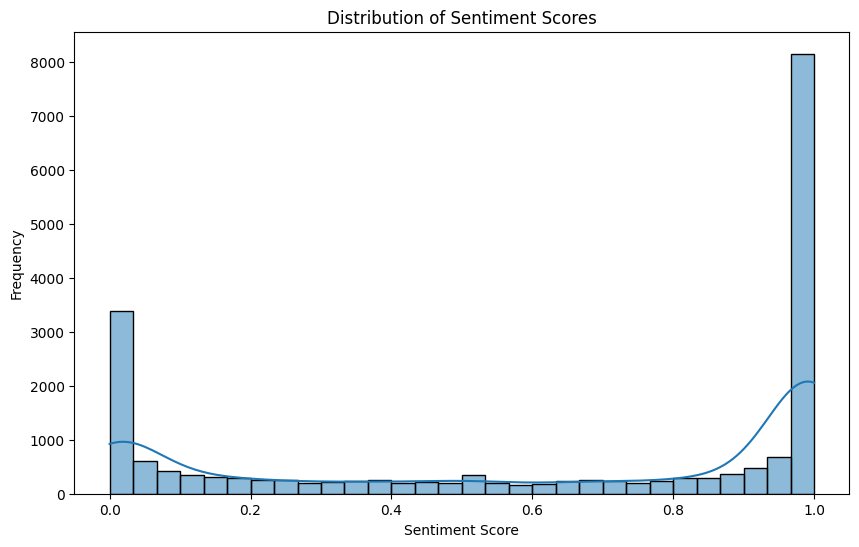

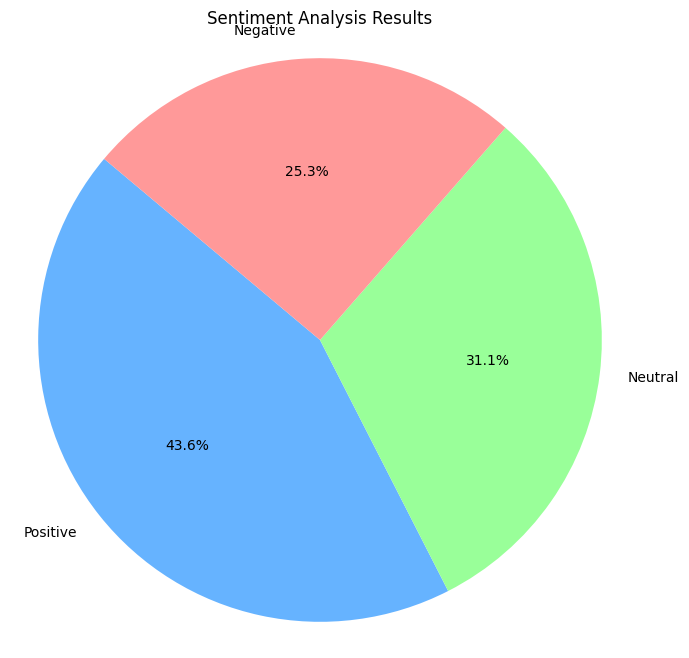

In [7]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.6:
        return 'Positive'
    elif score < 0.4:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Plot pie chart of sentiment categories
sentiment_counts = df['sentiment_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

##### 加入poster的numerical variable（粉丝数/关注数/获赞总量/笔记数）
##### 匹配用的是50w poster ID

In [8]:
import pandas as pd

# File paths
poster_file_path = '/home/disk1/red_disk1/test/poster_test_fashion_nlpclean.csv'
account_file_path = '/home/disk1/red_disk1/test/新红-账号搜索50w-id.csv'
output_file_path = '/home/disk1/red_disk1/test/test_nlpclean.csv'

# Read the existing CSV file
df_poster = pd.read_csv(poster_file_path)

# Read the new CSV file with additional columns
df_account = pd.read_csv(account_file_path)

# Display the first few rows of each DataFrame to understand their structure
print("Poster DataFrame columns:", df_poster.columns)
print("Account DataFrame columns:", df_account.columns)

# Ensure that 'poster_id' exists in both DataFrames
if 'poster_id' not in df_poster.columns or 'poster_id' not in df_account.columns:
    raise ValueError("The column 'poster_id' must be present in both CSV files.")

# Select the columns to be added from the account DataFrame
columns_to_add = ['粉丝数', '关注数', '赞藏总量', '笔记数']

# Merge the DataFrames on 'poster_id'
df_merged = pd.merge(df_poster, df_account[['poster_id'] + columns_to_add], on='poster_id', how='left')

# Rename the columns after merging
df_merged = df_merged.rename(columns={
    '粉丝数': 'fans_count',
    '关注数': 'following_count',
    '赞藏总量': 'total_likes',
    '笔记数': 'posts_count'
})

# Save the updated DataFrame to a new CSV file
df_merged.to_csv(output_file_path, index=False)

print(f"Data has been updated and saved to {output_file_path}.")


Poster DataFrame columns: Index(['poster_id', 'post_id', 'post_url', 'post_title', 'post_location',
       'post_date', 'post_time', 'post_content', 'post_tag', 'post_comments',
       'post_like', 'post_collect', 'post_img', 'post_comment_content',
       'post_fetch_time', 'summary', 'sentiment'],
      dtype='object')
Account DataFrame columns: Index(['序号', 'poster_id', '小红书账号昵称', '小红书账号头像', '小红书账号主页', '性别', '小红书id',
       '简介内容', '账号类别', '认证信息', '账号一级分类', '账号二级分类', '账号属性', '联系方式', '属地', '定位',
       'mcn机构信息', '上周新榜指数', '笔记数', '赞藏总量', '最近发文时间', '粉丝数', '关注数', '粉丝性别分布',
       '粉丝主要地域', '粉丝主要年龄', '粉丝兴趣标签', '新增作品', '爆文数', '删文数', '平均点赞', '平均预估阅读',
       '平均收藏', '平均评论数', '新增粉丝数', '图文报价', '图文CPE', '视频报价', '视频CPE', '图文CPM',
       '视频CPM', '近期商业笔记数', '商业笔记平均互动量', '数据周期'],
      dtype='object')
Data has been updated and saved to /home/disk1/red_disk1/test/test_nlpclean.csv.


In [ ]:
################################################### 5. 最终数据合并

增加sentiment

In [9]:
# 0 合并文本数值信息到图片中。

import pandas as pd

# 读取 CSV 文件
merged_df = pd.read_csv('/home/disk1/red_disk1/test/test_nlpclean.csv')
clustered_df = pd.read_csv('/home/disk1/red_disk1/test/clustered_labels_imagebind100.csv')

# 选择需要的列
selected_columns = ['poster_id', 'post_id', 'post_date', 'post_like', 'post_collect','post_comments','sentiment', 'fans_count','following_count','total_likes','posts_count']

# 从 merged_df 中提取所需列
merged_selected_df = merged_df[selected_columns]

# 合并数据框
merged_result_df = pd.merge(clustered_df, merged_selected_df, on=['poster_id', 'post_id'], how='left')

# 保存结果到新的 CSV 文件
merged_result_df.to_csv('/home/disk1/red_disk1/test/alldata_20%.csv', index=False)

print("数据已成功合并并保存到新的 CSV 文件中。")


数据已成功合并并保存到新的 CSV 文件中。


In [ ]:
# 以上，数据预处理步骤完成。
# 之后请跳转label.ipynb文件，开始进行分类和回归任务的label具体划分